<a href="https://colab.research.google.com/github/eriasaf/Machine/blob/main/Group%204E%20ML%20(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
# Import necessary libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time




# Load the Amazon Customer Reviews data

In [2]:
df = pd.read_csv("AmazonData.csv")

# New section

In [3]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60889 entries, 0 to 60888
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unique_ID      60889 non-null  int64 
 1   Category       60889 non-null  object
 2   Review_Header  60884 non-null  object
 3   Review_text    60857 non-null  object
 4   Rating         60889 non-null  int64 
 5   Own_Rating     60889 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.8+ MB
None


In [4]:
# Display the first few rows of the dataset
print(df.head())

   Unique_ID Category                           Review_Header  \
0     136040  smartTv                                Nice one   
1     134236   mobile  Huge battery life with amazing display   
2     113945    books                              Four Stars   
3     168076  smartTv                            Nice quality   
4     157302    books                               Nice book   

                                         Review_text  Rating Own_Rating  
0                                         I liked it       5   Positive  
1  I bought the phone on Amazon and been using my...       5   Positive  
2  Awesome book at reasonable price, must buy ......       4   Positive  
3                                               good       5   Positive  
4  The book is fine,not bad,contains nice concept...       3    Neutral  


In [5]:

# Summary statistics of numerical features
print(df.describe())

           Unique_ID        Rating
count   60889.000000  60889.000000
mean   140444.000000      4.081148
std     17577.284607      1.342067
min    110000.000000      1.000000
25%    125222.000000      4.000000
50%    140444.000000      5.000000
75%    155666.000000      5.000000
max    170888.000000      5.000000


In [6]:

# Calculate percentage of missing values in each column
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Creating a DataFrame to display the results
missing_values_df = pd.DataFrame({'Column': df.columns, 'Missing Percentage': missing_percentage})

# Print the DataFrame
print(missing_values_df)

                      Column  Missing Percentage
Unique_ID          Unique_ID            0.000000
Category            Category            0.000000
Review_Header  Review_Header            0.008212
Review_text      Review_text            0.052555
Rating                Rating            0.000000
Own_Rating        Own_Rating            0.000000


In [8]:
#Handling Missing Values
# Remove rows with any missing values
df_cleaned = df.dropna()


In [9]:
# Data Cleaning (removal of duplicates)
df.drop_duplicates(inplace=True)

In [10]:
#  Feature Engineering (Creating a new feature for simplicity)
df['review_length'] = df['Review_Header'] + df['Review_text']

# Step 7: Visualization
# Assuming visualizing a histogram for category, rating, own_rating and unique_id feature

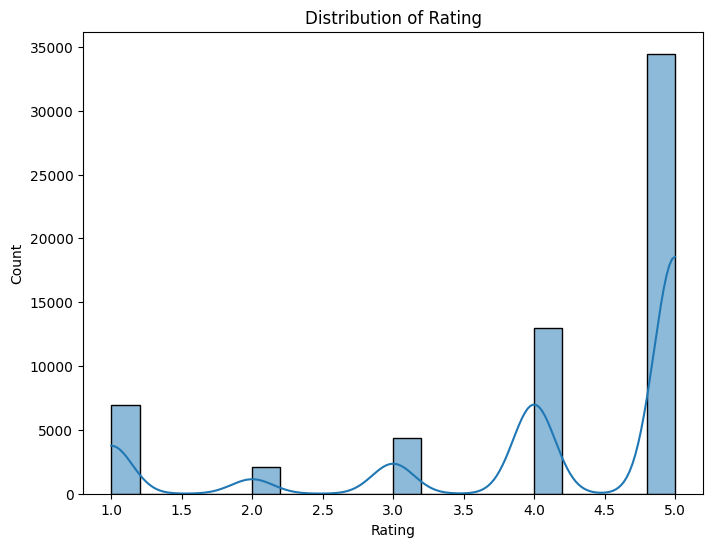

In [11]:

plt.figure(figsize=(8, 6))
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title('Distribution of Rating')
plt.show()

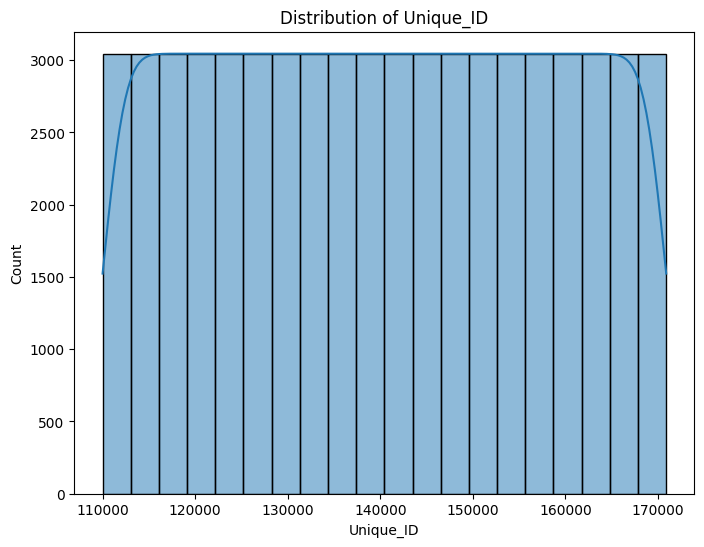

In [12]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Unique_ID'], bins=20, kde=True)
plt.title('Distribution of Unique_ID')
plt.show()

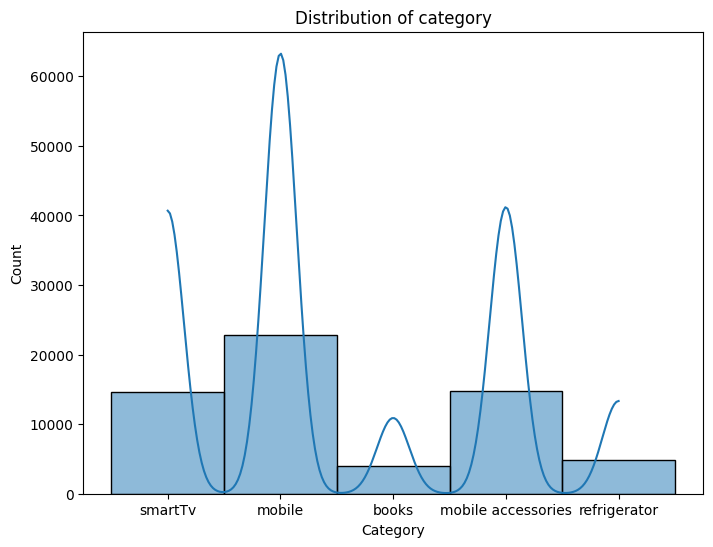

In [13]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Category'], bins=20, kde=True)
plt.title('Distribution of category')
plt.show()

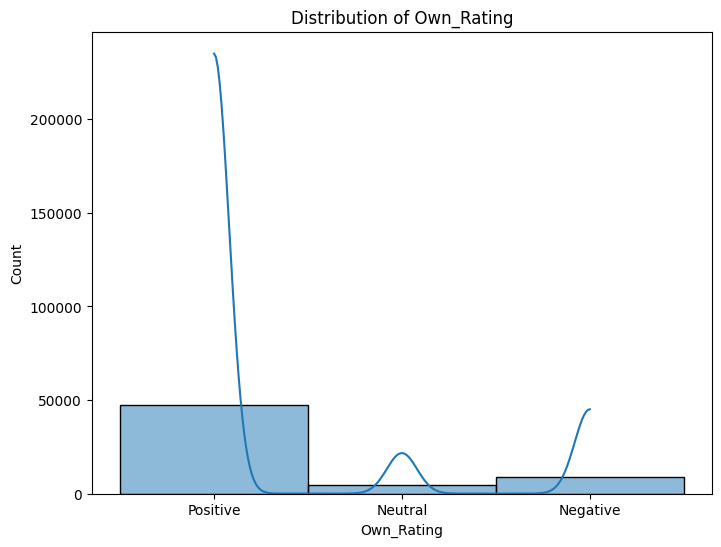

In [14]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Own_Rating'], bins=20, kde=True)
plt.title('Distribution of Own_Rating')
plt.show()

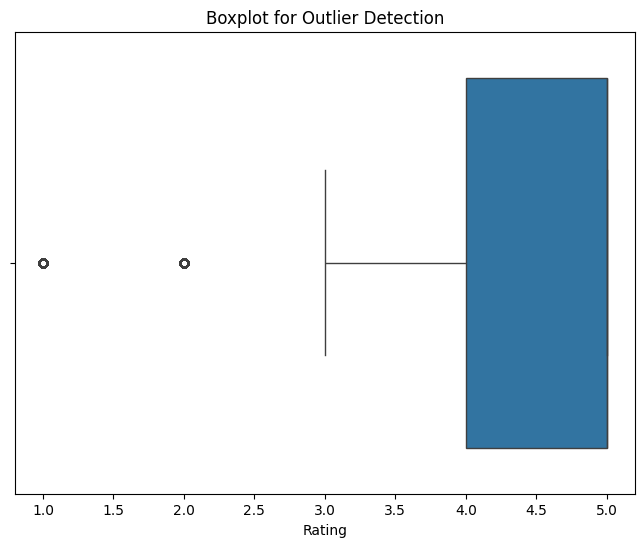

In [15]:
# Outlier Detection (Visualizing outliers using boxplot)
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Rating'])
plt.title('Boxplot for Outlier Detection')
plt.show()

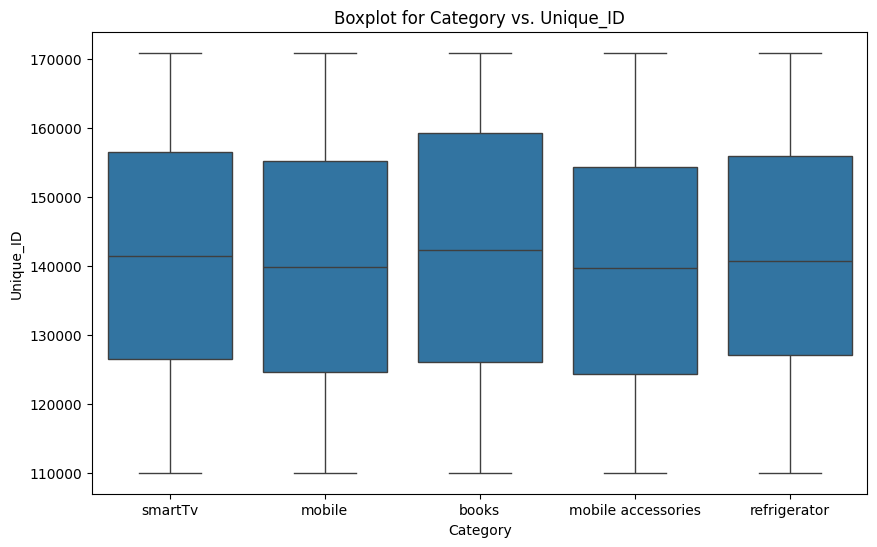

In [16]:
# Boxplot for Categorical Variable vs. Numerical Variable
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Unique_ID', data=df)
plt.title('Boxplot for Category vs. Unique_ID')
plt.show()

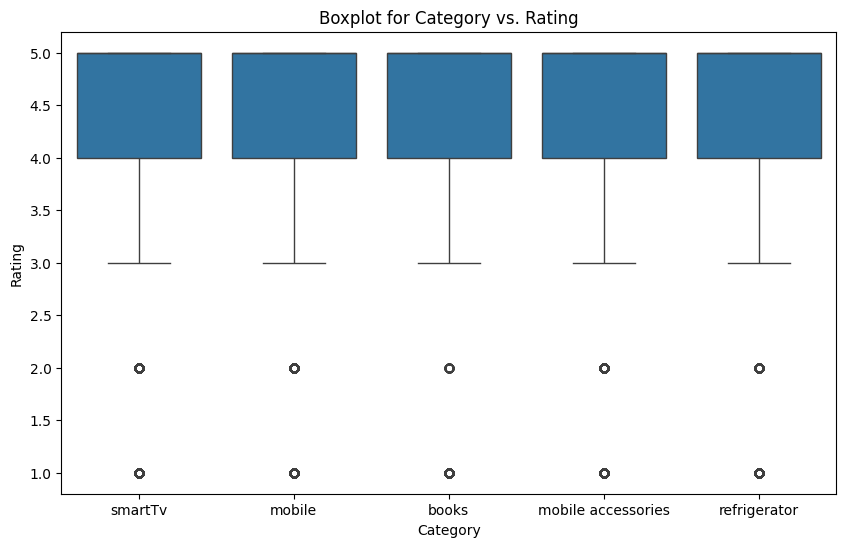

In [17]:

# Boxplot for Categorical Variable vs. Numerical Variable
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Rating', data=df)
plt.title('Boxplot for Category vs. Rating')
plt.show()

In [ ]:

# Statistical Analysis (Calculating correlation for simplicity)
correlation_matrix = df.corr()

<ipython-input-19-74060494d8ea>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df[['Rating', 'Own_Rating']].corr()


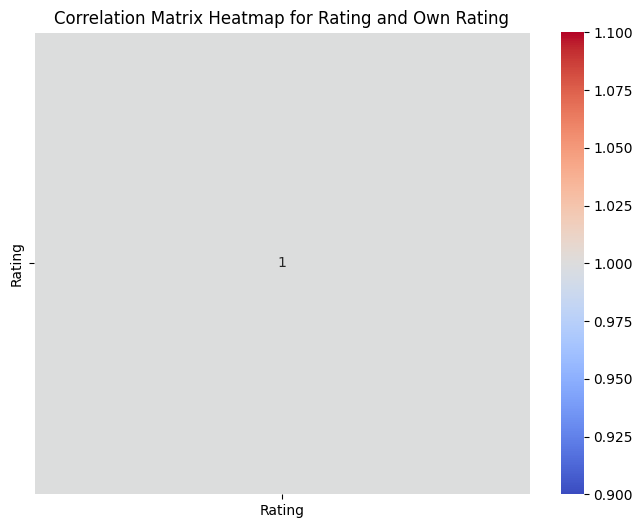

In [ ]:

# Step 8: Heatmap for Correlation Matrix
correlation_matrix = df[['Rating', 'Own_Rating']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix Heatmap for Rating and Own Rating')
plt.show()

<ipython-input-20-34a5809873bb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df[['Category', 'Rating']].corr()


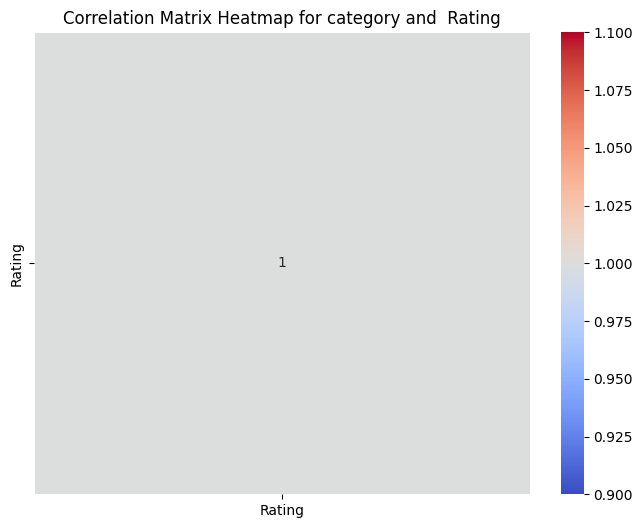

In [ ]:


# Step 8: Heatmap for Correlation Matrix
correlation_matrix = df[['Category', 'Rating']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix Heatmap for category and  Rating')
plt.show()

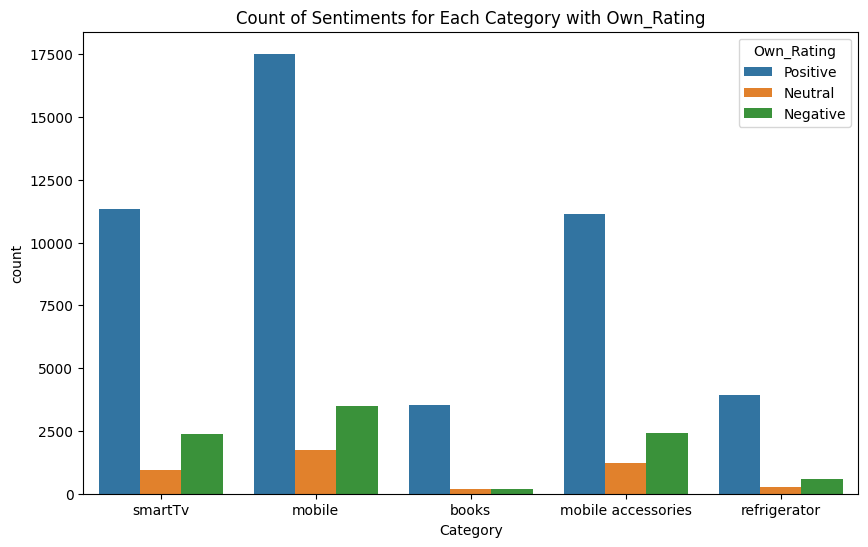

In [18]:
# Step 9: Patterns of Interest (Assuming exploring patterns based on a categorical variable)
plt.figure(figsize=(10, 6))
sns.countplot(x='Category', hue='Own_Rating', data=df)
plt.title('Count of Sentiments for Each Category with Own_Rating')
plt.show()

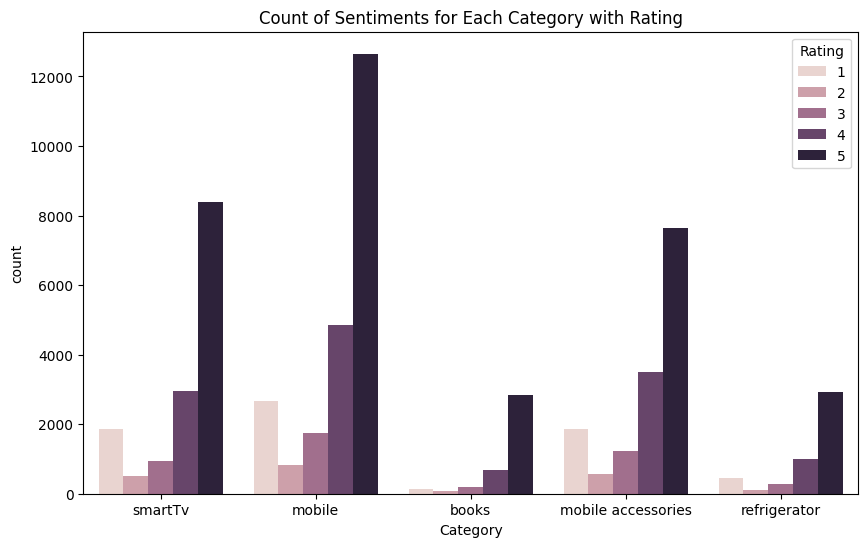

In [19]:

# Patterns of Interest (Assuming exploring patterns based on a category variable)
plt.figure(figsize=(10, 6))
sns.countplot(x='Category', hue='Rating', data=df)
plt.title('Count of Sentiments for Each Category with Rating')
plt.show()

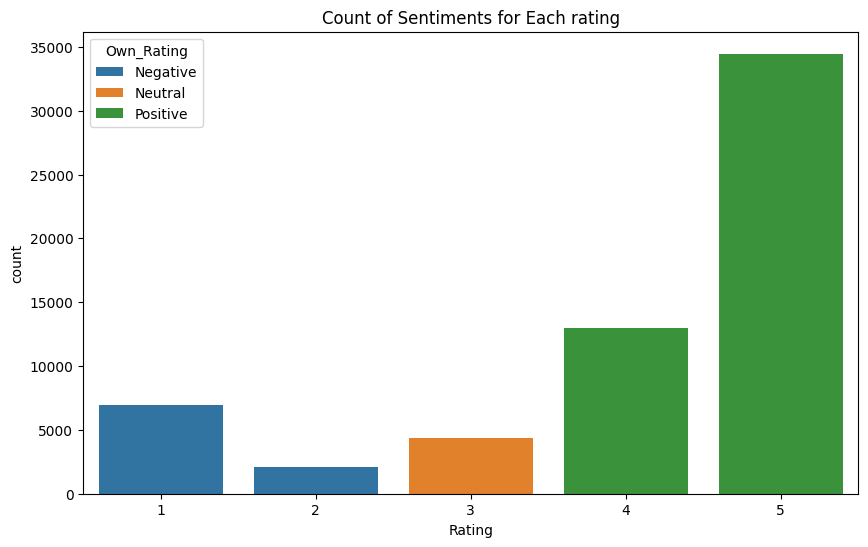

In [20]:

# Patterns of Interest (Assuming exploring patterns based on a rating variable)
plt.figure(figsize=(10, 6))
sns.countplot(x='Rating', hue='Own_Rating', data=df)
plt.title('Count of Sentiments for Each rating')
plt.show()

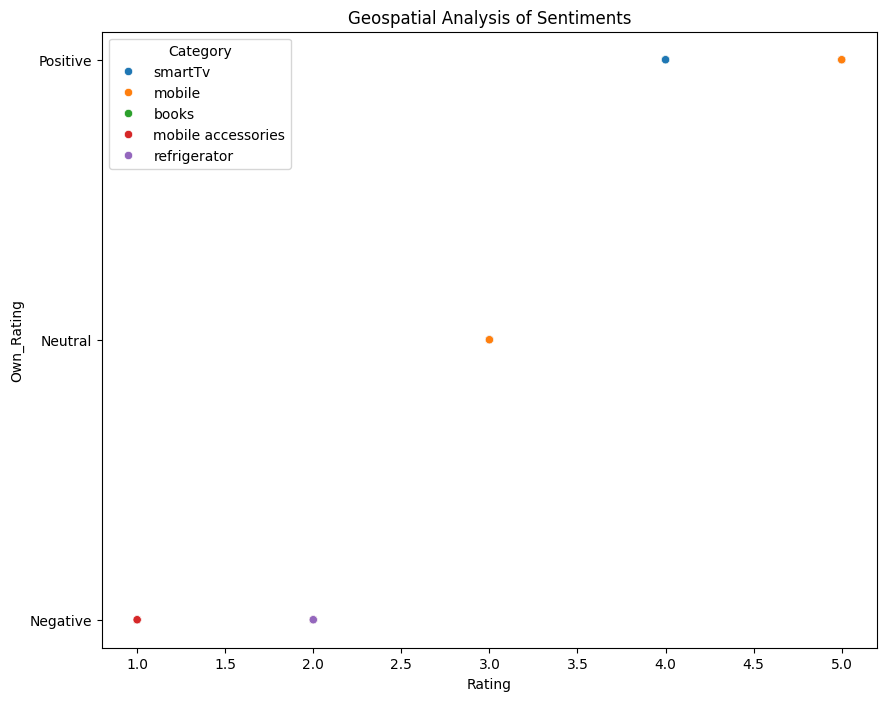

In [21]:
#  space analysis
# let's use a scatter plot for spatial analysis
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Rating', y='Own_Rating', hue='Category', data=df)
plt.title('Geospatial Analysis of Sentiments')
plt.show()

In [22]:


# Define criteria for positive, neutral, and negative sentiments
positive_sentiment = df[df['Rating'].isin([4, 5])]
neutral_sentiment = df[df['Rating'] == 3]
negative_sentiment = df[df['Rating'].isin([1, 2])]

# Calculate proportions
total_reviews = len(df)
positive_proportion = len(positive_sentiment) / total_reviews
neutral_proportion = len(neutral_sentiment) / total_reviews
negative_proportion = len(negative_sentiment) / total_reviews

print("Proportion of Positive Sentiments:", positive_proportion)
print("Proportion of Neutral Sentiments:", neutral_proportion)
print("Proportion of Negative Sentiments:", negative_proportion)

Proportion of Positive Sentiments: 0.7790569725237728
Proportion of Neutral Sentiments: 0.0717042487148746
Proportion of Negative Sentiments: 0.14923877876135264


In [ ]:

from wordcloud import WordCloud

# Drop rows with missing values in the 'Review_Header' column
df_cleaned = df.dropna(subset=['Review_Header'])

# Generate WordCloud
wordcloud_header = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(' '.join(df_cleaned['Review_Header']))

# Plot WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_header, interpolation='bilinear')
plt.title('Word Cloud for Review Headers')
plt.axis("off")
plt.show()

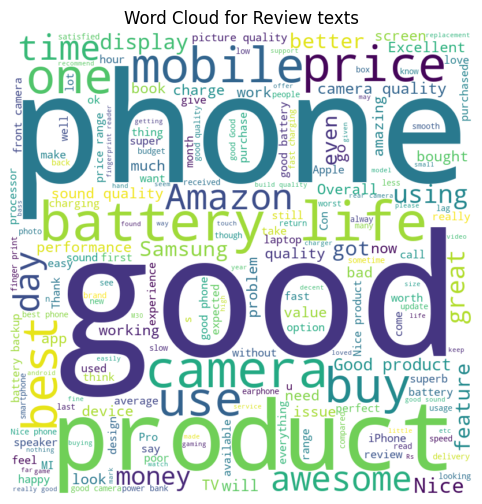

In [ ]:
#from wordcloud import WordCloud
# Drop rows with missing values in the 'Review_text' column
df_cleaned = df.dropna(subset=['Review_text'])

# Generate WordCloud( mostly used words)
wordcloud_text = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(' '.join(df_cleaned['Review_text']))

# Plot WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_text, interpolation='bilinear')
plt.title('Word Cloud for Review texts')
plt.axis("off")
plt.show()

Implementing random forest, SVM and Naive Bayes

In [48]:
# Preprocessing data
X = df['Review_text']
y = df['Own_Rating']
tfidf = TfidfVectorizer(max_features=1000, stop_words='english')
X = tfidf.fit_transform(X)
#y = tfidf.fit_transform(y)
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classifiers
rf_classifier = RandomForestClassifier(n_estimators=100)
svm_classifier = SVC(kernel='linear')
nb_classifier = MultinomialNB()

classifiers = {'Random Forest': rf_classifier, 'SVM': svm_classifier, 'Naive Bayes': nb_classifier}

# Train and evaluate classifiers
accuracy_scores = {}
classification_reports = {}
for name, classifier in classifiers.items():
    start_time = time.time()
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy_scores[name] = accuracy_score(y_test, y_pred)
    classification_reports[name] = classification_report(y_test, y_pred)

    end_time = time.time()

    print(f"{name} accuracy: {accuracy_scores[name]}")
    print(f"{name} classification report:\n{classification_reports[name]}")
    print(f"{name} training time: {end_time - start_time} seconds")
    print("-" * 50)


   


Random Forest accuracy: 0.8529411764705882
Random Forest classification report:
              precision    recall  f1-score   support

    Negative       0.73      0.65      0.69      1814
     Neutral       0.28      0.02      0.05       886
    Positive       0.88      0.97      0.92      9472

    accuracy                           0.85     12172
   macro avg       0.63      0.55      0.55     12172
weighted avg       0.81      0.85      0.82     12172

Random Forest training time: 92.46733593940735 seconds
--------------------------------------------------


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

SVM accuracy: 0.8560630956293132
SVM classification report:
              precision    recall  f1-score   support

    Negative       0.74      0.66      0.70      1814
     Neutral       0.00      0.00      0.00       886
    Positive       0.87      0.97      0.92      9472

    accuracy                           0.86     12172
   macro avg       0.54      0.54      0.54     12172
weighted avg       0.79      0.86      0.82     12172

SVM training time: 207.51382732391357 seconds
--------------------------------------------------
Naive Bayes accuracy: 0.8443148209004272
Naive Bayes classification report:
              precision    recall  f1-score   support

    Negative       0.78      0.53      0.63      1814
     Neutral       0.43      0.00      0.01       886
    Positive       0.85      0.98      0.91      9472

    accuracy                           0.84     12172
   macro avg       0.69      0.51      0.52     12172
weighted avg       0.81      0.84      0.80     12172

Naive

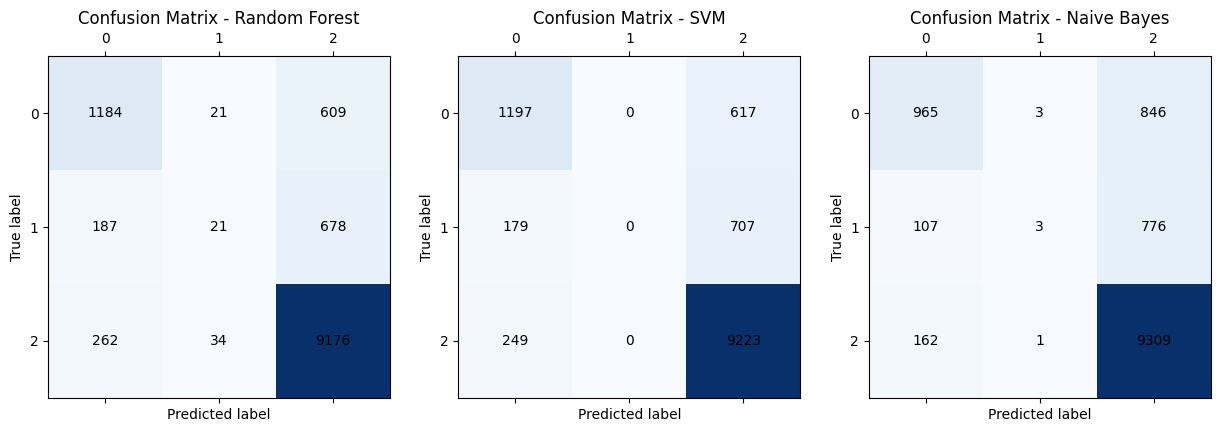

In [49]:
# Plotting confusion matrices
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for idx, (name, matrix) in enumerate(conf_matrices.items()):
    axs[idx].matshow(matrix, cmap='Blues')
    axs[idx].set_title(f'Confusion Matrix - {name}')
    axs[idx].set_xlabel('Predicted label')
    axs[idx].set_ylabel('True label')
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            axs[idx].text(j, i, str(matrix[i, j]), ha='center', va='center', color='black')


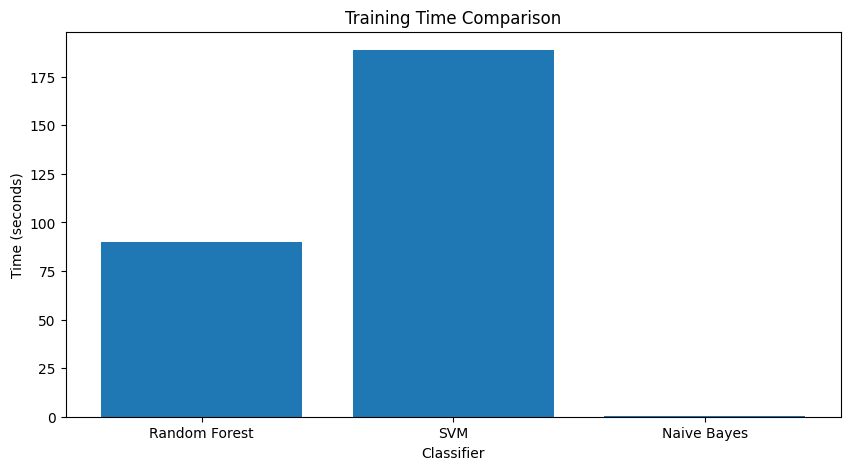

In [50]:
# Plotting time graphs
plt.figure(figsize=(10, 5))
plt.bar(times.keys(), times.values())
plt.title('Training Time Comparison')
plt.xlabel('Classifier')
plt.ylabel('Time (seconds)')
plt.show()


In [26]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [27]:
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)



In [29]:
# Perform Grid Search Cross Validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=2, n_jobs=-1, verbose=2)
grid_search.fit(X_train_tfidf, y_train)

Fitting 2 folds for each of 81 candidates, totalling 162 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [30]:
# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


In [31]:
# Predict using the best model
best_rf_classifier = grid_search.best_estimator_
y_pred = best_rf_classifier.predict(X_test_tfidf)

In [32]:

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.645087085113375


In [33]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           1       0.61      0.72      0.66      1382
           2       1.00      0.00      0.00       432
           3       0.43      0.03      0.06       886
           4       0.34      0.11      0.16      2575
           5       0.68      0.95      0.79      6897

    accuracy                           0.65     12172
   macro avg       0.61      0.36      0.34     12172
weighted avg       0.59      0.65      0.56     12172



In [17]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
# Preprocess your data if necessary (e.g., cleaning, tokenization, etc.)

# Split data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(data['feedback'], data['sentiment'], test_size=0.2, random_state=42)

# Define a pipeline for each model

# Support Vector Machine (SVM) Pipeline
svm_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=1000)),
    ('svm', SVC())
])

# Naive Bayes Pipeline
nb_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=1000)),
    ('nb', MultinomialNB())
])

# Random Forest Pipeline
rf_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=1000)),
    ('rf', RandomForestClassifier())
])

# Gradient Boosting Pipeline
gb_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=1000)),
    ('gb', GradientBoostingClassifier())
])

# Define parameter grids for hyperparameter tuning
svm_param_grid = {
    'svm__C': [0.1, 1, 10],
    'svm__kernel': ['linear', 'rbf']
}

nb_param_grid = {
    'nb__alpha': [0.1, 0.5, 1.0]
}

rf_param_grid = {
    'rf__n_estimators': [100, 200, 300],
    'rf__max_depth': [None, 10, 20]
}

gb_param_grid = {
    'gb__n_estimators': [100, 200, 300],
    'gb__learning_rate': [0.1, 0.05, 0.01]
}



In [18]:
# Perform GridSearchCV for each model to find the best hyperparameters
svm_grid_search = GridSearchCV(svm_pipeline, svm_param_grid, cv=5, n_jobs=-1)
svm_grid_search.fit(X_train, y_train)

nb_grid_search = GridSearchCV(nb_pipeline, nb_param_grid, cv=5, n_jobs=-1)
nb_grid_search.fit(X_train, y_train)

rf_grid_search = GridSearchCV(rf_pipeline, rf_param_grid, cv=5, n_jobs=-1)
rf_grid_search.fit(X_train, y_train)

gb_grid_search = GridSearchCV(gb_pipeline, gb_param_grid, cv=5, n_jobs=-1)
gb_grid_search.fit(X_train, y_train)

In [ ]:
# Get the best models
best_svm_model = svm_grid_search.best_estimator_
best_nb_model = nb_grid_search.best_estimator_
best_rf_model = rf_grid_search.best_estimator_
best_gb_model = gb_grid_search.best_estimator_


In [ ]:
# Predictions
svm_predictions = best_svm_model.predict(X_test)
nb_predictions = best_nb_model.predict(X_test)
rf_predictions = best_rf_model.predict(X_test)
gb_predictions = best_gb_model.predict(X_test)

In [ ]:
# Evaluate the models
svm_accuracy = accuracy_score(y_test, svm_predictions)
nb_accuracy = accuracy_score(y_test, nb_predictions)
rf_accuracy = accuracy_score(y_test, rf_predictions)
gb_accuracy = accuracy_score(y_test, gb_predictions)

print("Support Vector Machine (SVM) Accuracy:", svm_accuracy)
print("Naive Bayes Accuracy:", nb_accuracy)
print("Random Forest Accuracy:", rf_accuracy)
print("Gradient Boosting Accuracy:", gb_accuracy)


In [ ]:
# You can also print classification reports for more detailed evaluation
print("Support Vector Machine (SVM) Classification Report:")
print(classification_report(y_test, svm_predictions))

print("Naive Bayes Classification Report:")
print(classification_report(y_test, nb_predictions))

print("Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions))

print("Gradient Boosting Classification Report:")
print(classification_report(y_test, gb_predictions))


implementing CNN, Hybrid-CNN, GRU, Bi-LSTM

In [53]:
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, Model
from keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, LSTM, GRU, Bidirectional, concatenate, Input

# Preprocess your data if necessary (e.g., cleaning, tokenization, etc.)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_cleaned['Review_text'], df_cleaned['Own_Rating'], test_size=0.2, random_state=42)


In [54]:
# Tokenize text data
max_words = 10000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

In [55]:
# Pad sequences to ensure uniform length
max_sequence_length = 100
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_sequence_length)
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_sequence_length)

In [56]:
# CNN Model
cnn_model = Sequential([
    Embedding(input_dim=max_words, output_dim=100),
    Conv1D(64, 5, activation='relu'),
    MaxPooling1D(5),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [57]:
# Compile your model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [58]:

# Bi-LSTM Model
lstm_model = Sequential([
    Embedding(input_dim=max_words, output_dim=100),
    Bidirectional(LSTM(64, return_sequences=True)),
    Bidirectional(LSTM(64)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [59]:
# Specify the input length separately
lstm_model.add(Dense(max_sequence_length))

In [60]:
# GRU Model
gru_model = Sequential([
    Embedding(input_dim=max_words, output_dim=100),
    GRU(64, return_sequences=True, input_shape=(max_sequence_length, 100)),
    GRU(64),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])



c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [61]:
# Hybrid CNN Model
input_layer = Input(shape=(max_sequence_length,))
embedding_layer = Embedding(max_words, 100)(input_layer)
conv_layer = Conv1D(64, 5, activation='relu')(embedding_layer)
max_pooling_layer = MaxPooling1D(5)(conv_layer)
flatten_layer = Flatten()(max_pooling_layer)
dense_layer = Dense(64, activation='relu')(flatten_layer)
output_layer = Dense(1, activation='sigmoid')(dense_layer)

hybrid_cnn_model = Model(inputs=input_layer, outputs=output_layer)

In [62]:
# Compile models
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
gru_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
hybrid_cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
# Train models
cnn_model.fit(X_train_padded, y_train, epochs=5, batch_size=64, validation_split=0.2)
#lstm_model.fit(X_train_padded, y_train, epochs=5, batch_size=64, validation_split=0.2)
gru_model.fit(X_train_padded, y_train, epochs=5, batch_size=64, validation_split=0.2)
hybrid_cnn_model.fit(X_train_padded, y_train, epochs=5, batch_size=64, validation_split=0.2)


In [65]:
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
gru_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
hybrid_cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [26]:
# Evaluate models
cnn_scores = cnn_model.evaluate(X_test_padded, y_test)
print("CNN Test Accuracy:", cnn_scores[1])

#lstm_scores = lstm_model.evaluate(X_test_padded, y_test)
#print("Bi-LSTM Test Accuracy:", lstm_scores[1])

gru_scores = gru_model.evaluate(X_test_padded, y_test)
print("GRU Test Accuracy:", gru_scores[1])

hybrid_cnn_scores = hybrid_cnn_model.evaluate(X_test_padded, y_test)
print("Hybrid CNN Test Accuracy:", hybrid_cnn_scores[1])

381/381 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.1052 - loss: -48118611574784.0000
CNN Test Accuracy: 0.10919398814439774
381/381 ━━━━━━━━━━━━━━━━━━━━ 35s 92ms/step - accuracy: 0.1052 - loss: -119001.6719
GRU Test Accuracy: 0.10919398814439774
381/381 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.1052 - loss: -3852593528832.0000
Hybrid CNN Test Accuracy: 0.10919398814439774


In [2]:
import mlflow
import dvc.api
# Start MLflow tracking
mlflow.set_tracking_uri("http://localhost:5000")  # Set MLflow tracking URI
mlflow.set_experiment("PREDICTIVE TEXT ANALYTICS FOR SENTIMENTANALYSIS ON CUSTOMERFEEDBACK")

2024/04/13 18:08:35 INFO mlflow.tracking.fluent: Experiment with name 'PREDICTIVE TEXT ANALYTICS FOR SENTIMENTANALYSIS ON CUSTOMERFEEDBACK' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlflow-artifacts:/468742735607723598', creation_time=1713020915042, experiment_id='468742735607723598', last_update_time=1713020915042, lifecycle_stage='active', name='PREDICTIVE TEXT ANALYTICS FOR SENTIMENTANALYSIS ON CUSTOMERFEEDBACK', tags={}>

In [3]:
import mlflow

# Check if there's an active MLflow run
if mlflow.active_run():
    # If there's an active run, end it
    mlflow.end_run()

# Start a new MLflow run
mlflow.start_run()

<ActiveRun: >

In [4]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
#from sklearn.model_selection import train_test_split

# Load data
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)

# Start MLflow tracking
#mlflow.start_run()

# Log parameters
mlflow.log_param("n_estimators", 100)
mlflow.log_param("max_depth", None)

# Log metrics
train_accuracy = rf_model.score(X_train, y_train)
test_accuracy = rf_model.score(X_test, y_test)
mlflow.log_metric("train_accuracy", train_accuracy)
mlflow.log_metric("test_accuracy", test_accuracy)

# Log artifacts (model)
mlflow.sklearn.log_model(rf_model, "random_forest_model")

# End MLflow tracking
mlflow.end_run()

In [ ]:
# Track changes to datasets and models
# Initialize DVC
dvc init

# Add data file to DVC
dvc add data/AmazonData.csv

# Add model file to DVC
dvc add random_forest_model


In [11]:
runs = mlflow.search_runs()
runs

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.test_accuracy,metrics.train_accuracy,params.max_depth,params.n_estimators,tags.mlflow.runName,tags.mlflow.user,tags.mlflow.source.type,tags.mlflow.log-model.history,tags.mlflow.source.name
0,e98698eae3244724b5780dc3b6e2f14a,468742735607723598,FINISHED,mlflow-artifacts:/468742735607723598/e98698eae...,2024-04-13 15:08:40.988000+00:00,2024-04-13 15:09:12.387000+00:00,1.0,1.0,None,100,adorable-stoat-212,USER,LOCAL,"[{""run_id"": ""e98698eae3244724b5780dc3b6e2f14a""...",C:\Users\USER\AppData\Roaming\Python\Python311...


In [13]:
import mlflow.pyfunc
from mlflow.models.signature import infer_signature

# Load the model from MLflow
model_uri = "runs:/e98698eae3244724b5780dc3b6e2f14a/random_forest_model"  # Replace <RUN_ID> with the actual run ID
model = mlflow.pyfunc.load_model(model_uri)

# Define a function to predict sentiment using the loaded model
def predict_sentiment(features):
    return model.predict(features)

# Deploy the model using MLflow's model serving capabilities
#mlflow.pyfunc.serve(model_uri=model_uri, host="0.0.0.0", port=5000)


In [ ]:
# Deploy the model using MLflow's model serving capabilities
mlflow.pyfunc.serve(model_uri=model_uri, host="0.0.0.0", port=5000)

In [ ]:
mlflow models serve -m runs:/e98698eae3244724b5780dc3b6e2f14a/random_forest_model -p 5001


TEST DEPLOYMENT

In [ ]:
import requests

# Example input data for testing
data = {"features": [[1, 2, 3, 4], [5, 6, 7, 8]]}

# Send a POST request to the server
response = requests.post("http://localhost:5001/invocations", json=data)

# Print the predictions
print(response.json())


In [ ]:
# Use an official Python runtime as a parent image DOCKER FILE
FROM python:3.8-slim

# Set the working directory in the container
WORKDIR /app

# Copy the current directory contents into the container at /app
COPY . /app

# Install any needed dependencies specified in requirements.txt
RUN pip install mlflow

# Make port 5001 available to the world outside this container
EXPOSE 5001

# Define environment variable
ENV MLFLOW_TRACKING_URI=http://localhost:5000

# Run mlflow models serve when the container launches
CMD ["mlflow", "models", "serve", "-m", "runs:/<RUN_ID>/random_forest_model", "-p", "5001"]


In [ ]:
docker build -t mlflow-server .


In [ ]:
docker run -p 5001:5001 mlflow-server
